## **IMPORTAÇÕES**

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

## **DADOS**

In [4]:
# Dados no plano 2D
c=np.array([[2,3],[5,9],[3,5],[1,3],[4,3],[3,6],[0.5,2],[7,2]])

# Classe real de cada dado
x=np.array([0,0,0,0,1,1,1,1])

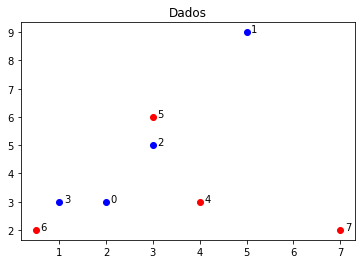

In [5]:
# Plotagem dos dados em um plano
cor=["bo","ro"]
plt.title("Dados")
for i in range(len(c)):
    plt.text(c[i,0]+0.1,c[i,1],str(i))
    plt.plot(c[i,0],c[i,1],cor[x[i]])
plt.show()

## **TREINANDO MODELO**
---

##### https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [6]:
#Variável com Regressão Logistica
pred_reglog= LogisticRegression()

In [7]:
# Aplicando dados de treinamento
pred_reglog.fit(c,x)

LogisticRegression()

In [8]:
# Realizando predição
pred_rl= pred_reglog.predict(c)

# Comparação entre a classe real e o que o modelo classificou
for i in range(len(c)):
    print(pred_rl[i],x[i])

1 0
0 0
0 0
0 0
1 1
0 1
1 1
1 1


## **MÉTRICAS OBTIDA NO MODELO**

### **Acúracia**

In [9]:
# Função de acurácia
def accuracy(x,y):
    acertos=0
    for i in range(len(x)):
        if x[i]==y[i]:acertos+=1
    return str(acertos/len(x)*100)+"%"

print(
    "Acurácia:" ,
    accuracy(pred_rl,x))

Acurácia: 75.0%


In [10]:
# Acurácia no parâmentro importado do lib sklearn
accuracy_score(pred_rl,x)

0.75

### **Matriz de confusão**
---

##### https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html

##### ***Manual***

In [11]:
# Matriz de confusão

def matriz_confusion(x,y):
    tp,fp,tn,fn=0,0,0,0
    for i in range(len(x)):
        if x[i]==1 and y[i]==1:tp+=1
        elif x[i]==1 and y[i]==0:fp+=1
        elif x[i]==0 and y[i]==0:tn+=1
        else:fn+=1
    return tp,fp,tn,fn

In [12]:
# Salvando os valores na variavel
tp,fp,tn,fn=matriz_confusion(x,pred_rl)

# Print matriz de confusão
print(tp,fn)
print(fp,tn)

3 1
1 3


##### ***Automático***

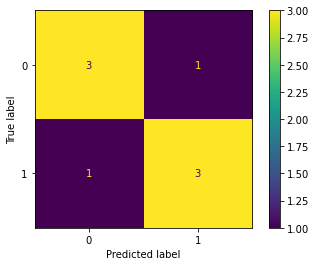

In [50]:
# Matriz de confusão direto pelo sklearn
plot_confusion_matrix(pred_reglog,c,x)

### **Precision**
---

##### https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html

##### ***Manual***

In [15]:
# Fórmula precision

def f_precision(tp,fp):
    return tp/(tp+fp)

In [39]:
valor_precision=f_precision(tp,fp)
print(valor_precision)

0.75


##### ***Automático***

In [27]:
# Fórmuca através do sklearn

precision_score(x,pred_rl)

0.75

### **Recall**
---

##### https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html

##### ***Manual***

In [29]:
# Fórmula manual

def recall(tp,fn):
    return tp/(tp+fn)

In [37]:
valor_recall=recall(tp,fn)
print(valor_recall)

0.75


##### ***Automático***

In [33]:
recall_score(x,pred_rl)

0.75

### **F1-Score**
---

##### https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html

##### ***Manual***

In [42]:
# Fórmula manual

def f1_score_manual(precision,recall):
    return 2*precision*recall/(precision + recall)

In [43]:
f1_score_manual(valor_precision,valor_recall)

0.75

##### ***Automático***

In [46]:
f1_score(x,pred_rl)

0.75

## **PREDIÇÃO DE DADOS**

In [18]:
# Verificando a probabilidade de novos dados com predict_proba do LogistiRegression
# Retorna um array com a probabilidade de ser 0 (Negativo) e 1 (Positivo)
pred_reglog.predict_proba([[6.4,4.1]])

array([[0.21398567, 0.78601433]])

In [19]:
# Realizando a predição de um novo dado, de acordo com o valor de threshould e do predict_proba ele realiza a predição.
# Retorna um array com 0 ou 1.
pred_reglog.predict([[9,8]])

array([1])

## **PLOTANDO RETA DA REGRESSÃO LOGISTÍCA**

#### **Obtendo os thetas 0, 1 e 2**

In [20]:
# Verificando e obtendo Thetas 0, 1 e 2
# Theta 0 se obtém a partir do LogisticRegression.intercept()
# Theta 1 e 2 se obtém através do LogisticRegression.coef_()
print(
      "Theta0 " + str(pred_reglog.intercept_[0]),"\n"
      "Theta1 " + str(pred_reglog.coef_[0][0]),"\n"
      "Theta2 " + str(pred_reglog.coef_[0][1])
     )

# Salvando thetas nas váriaveis
theta0=float(pred_reglog.intercept_[0])
theta1=float(pred_reglog.coef_[0][0])
theta2=float(pred_reglog.coef_[0][1])

Theta0 0.7159310938640121 
Theta1 0.37884990659470175 
Theta2 -0.44865963383336166


In [21]:
# Fórmula para definir X2
# x2= -(theta1/theta2)x1-theta0/theta2
def x2(x1,theta0,theta1,theta2):
    return -(theta1/theta2)*x1-theta0/theta2

### **Plotagem da reta**

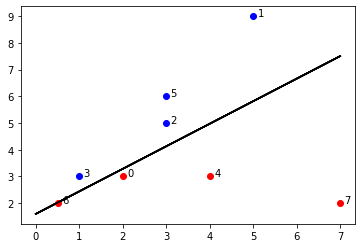

In [22]:
# Plotagem da reta Regressão de logistica com os dados da predição pred_rl
cor="bo","ro"

for i in range(len(c)):
    plt.text(c[i,0]+0.1,c[i,1],str(i)),
    plt.plot(c[i,0],c[i,1],cor[pred_rl[i]]),
    plt.plot([0,7],[x2(0,theta0,theta1,theta2),x2(7,theta0,theta1,theta2)], color="black")
plt.show()

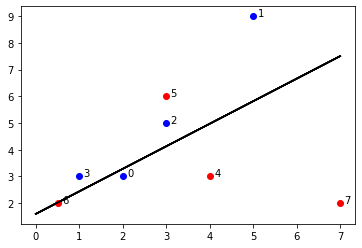

In [23]:
# Plotagem dos dados com a classificação real
for i in range(len(c)):
    plt.text(c[i,0]+0.1,c[i,1],str(i)),
    plt.plot(c[i,0],c[i,1],cor[x[i]])
    plt.plot([0,7],[x2(0,theta0,theta1,theta2),x2(7,theta0,theta1,theta2)], color="black")
plt.show()